<a href="https://colab.research.google.com/github/Haritha-datascientist/WalmartSalesPrediction/blob/main/walmart_insights_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#read the dataset
#df = pd.read_csv("Walmart (1).csv",skiprows=1, names=['Store','Date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'])
df=pd.read_csv("Walmart (1).csv")
df=df[df["Holiday_Flag"]!="Holiday_Flag"]
df.shape

(12873, 8)

In [3]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106
4,1,05-03-2010,1554806.68,0,46.5,2.625,211.3501429,8.106


In [4]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,12873,12870,12870,12870,12870,12870,12870,12870
unique,48,143,6435,2,3528,892,2145,349
top,1,05-02-2010,1643690.9,0,50.43,3.638,130.5502069,8.099
freq,286,90,2,11970,22,78,22,156


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12873 entries, 0 to 12873
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Store         12873 non-null  object
 1   Date          12870 non-null  object
 2   Weekly_Sales  12870 non-null  object
 3   Holiday_Flag  12870 non-null  object
 4   Temperature   12870 non-null  object
 5   Fuel_Price    12870 non-null  object
 6   CPI           12870 non-null  object
 7   Unemployment  12870 non-null  object
dtypes: object(8)
memory usage: 905.1+ KB


In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
# CHECK THE MISSING VALUES
df.isnull().sum()

Store           0
Date            3
Weekly_Sales    3
Holiday_Flag    3
Temperature     3
Fuel_Price      3
CPI             3
Unemployment    3
dtype: int64

In [8]:
#drop null values
df=df.dropna()
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
#duplicate values
df.duplicated().sum()

6435

In [10]:
#drop duplicates
df=df.drop_duplicates()
#check duplicates removed
df.duplicated().sum()

0

In [11]:
#change datatypes 
df['Store']=df['Store'].astype('int')
df['Holiday_Flag']=df['Holiday_Flag'].astype('int')
df['Date']=df['Date'].astype('datetime64')
df['Weekly_Sales']=df['Weekly_Sales'].astype('float')
df['Temperature']=df['Temperature'].astype('float')
df['Fuel_Price']=df['Fuel_Price'].astype('float')
df['CPI']=df['CPI'].astype('float')
df['Unemployment']=df['Unemployment'].astype('float')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.5 KB


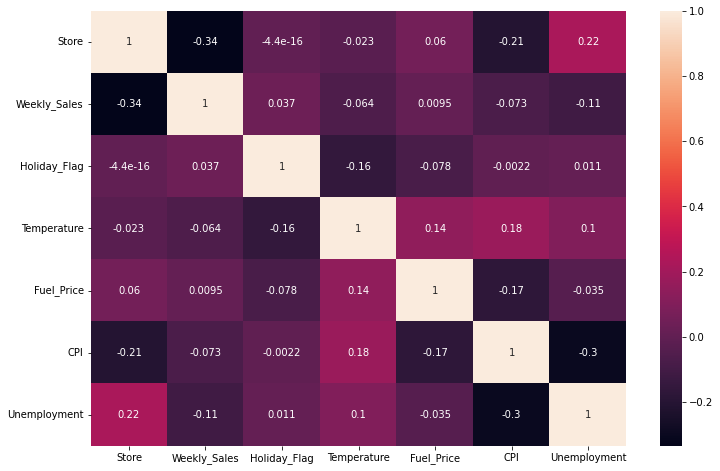

In [13]:
# visualize correlation matrix in Seaborn using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
#Splitting Date Column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [15]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


#Data Visualizations

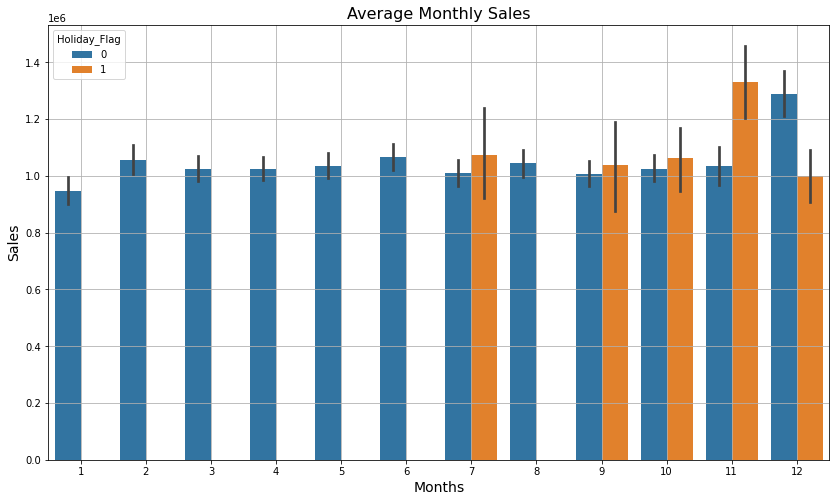

In [16]:
#Average Monthly Sales with holiday flag 
import seaborn as sns
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',hue="Holiday_Flag",data=df)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
#plt.savefig('plots/avg_monthly_sales.png')
plt.grid()

* From the visualization november is having highest sales and in particular with holiday flag than without holiday flag 
* December is quite contrast where without holilday flag has highest sales than with holiday flag sales.
* Overall 7-12 month has higher sales than remaining months of the year


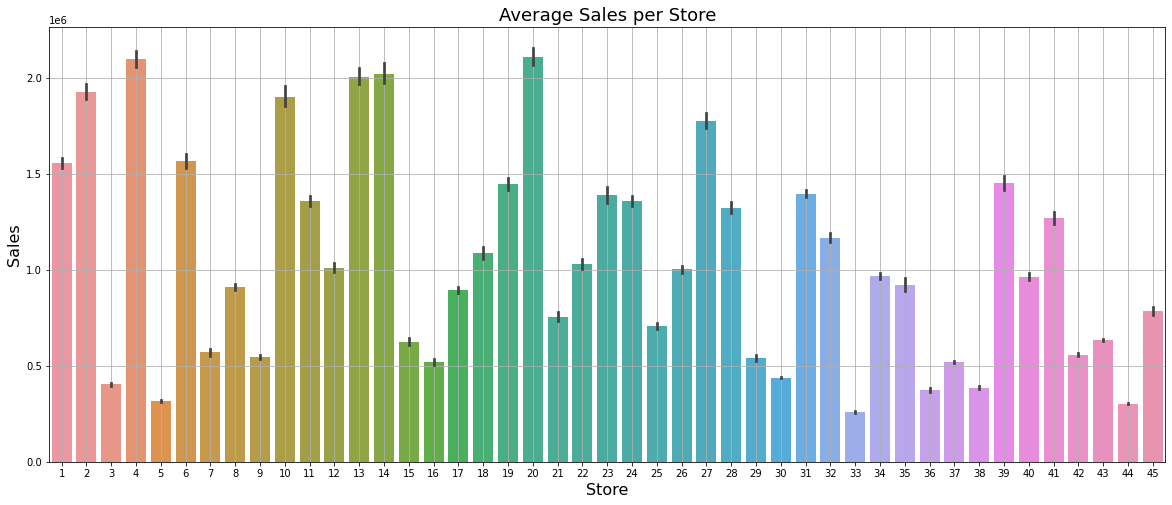

In [17]:
#Average Weekly Sales Store wise

plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
#plt.savefig('plots/avg_sales_store.png')
plt.show()

* Store 20 is having the highest sales. 
* 4,13,14 stores are next highest sales

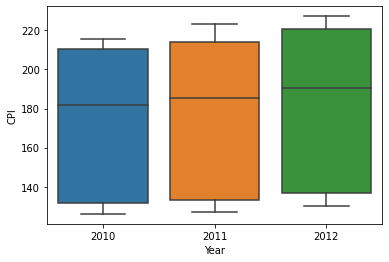

In [18]:
sns.boxplot(y="CPI",x="Year",data=df)


* CPI has increased over years

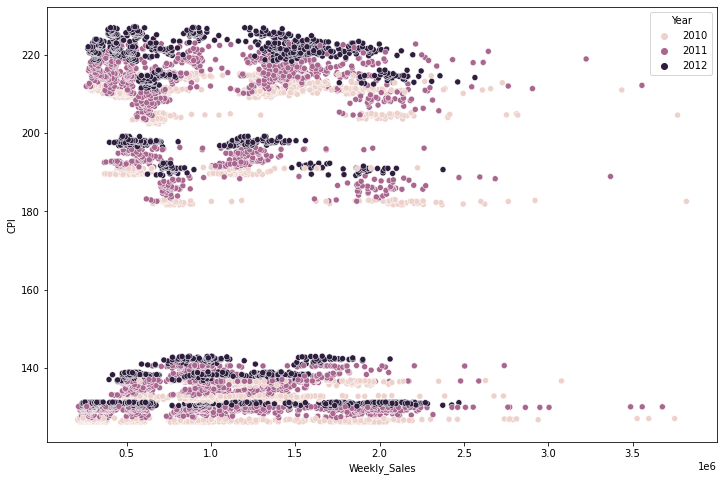

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="CPI",x="Weekly_Sales",data=df,hue='Year')

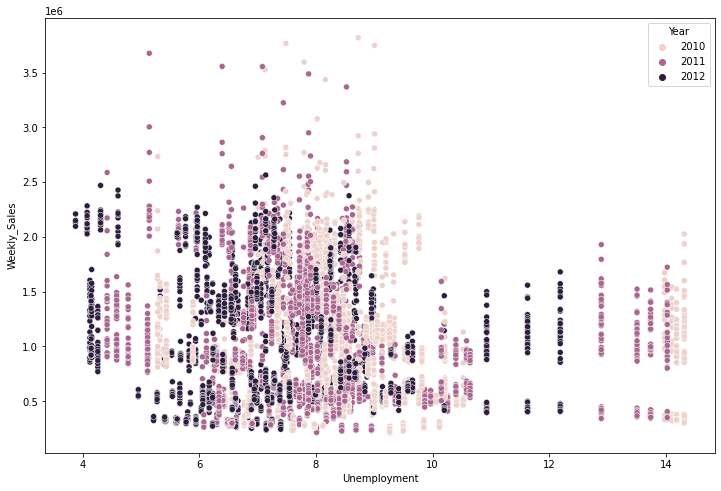

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Unemployment",y="Weekly_Sales",data=df,hue='Year')

* Lower the unemployment higher the sales.

In [21]:
df.index=pd.to_datetime(df['Date'])

In [23]:
df.drop(['Date','Year','Month','Week'], axis = 1, inplace = True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


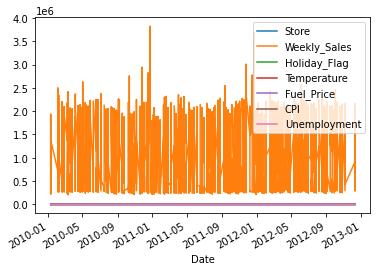

In [24]:
df.plot()